# 📈 Notebook 4: Modelo 2 - Regresión Lineal Múltiple

**Objetivo:** Construir el SEGUNDO modelo usando **Regresión Lineal Múltiple**

**Pregunta 5 - Modelo 2:** Segundo modelo de regresión para comparar con el primero


## 1. Cargar Datos


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, classification_report
import joblib
import warnings

warnings.filterwarnings("ignore")

X_train = pd.read_csv("../resultados/X_train.csv")
y_train = pd.read_csv("../resultados/y_train.csv").values.ravel()

print(f"✅ Datos cargados:")
print(f"   X_train: {X_train.shape}")
print(f"   y_train: {y_train.shape}")

✅ Datos cargados:
   X_train: (22792, 29)
   y_train: (22792,)


## 2. Entrenar Modelo de Regresión Lineal


In [2]:
modelo_lineal = LinearRegression()

if X_train.isnull().sum().sum() > 0:
    X_train = X_train.fillna(0)
print("🚀 Entrenando Modelito 2: Regresión Lineal Múltiple...")
modelo_lineal.fit(X_train, y_train)
print("✅ Modelo entrenado exitosamente")

r2_train = modelo_lineal.score(X_train, y_train)
print(f"📊 R² en TRAIN: {r2_train:.4f}")

🚀 Entrenando Modelito 2: Regresión Lineal Múltiple...
✅ Modelo entrenado exitosamente
📊 R² en TRAIN: 0.3413


## 3. Predicciones con Umbral 0.5


In [3]:
y_train_pred_continuo = modelo_lineal.predict(X_train)

print(
    f"Rango de predicciones: [{y_train_pred_continuo.min():.4f}, {y_train_pred_continuo.max():.4f}]"
)

# Aplicar umbral 0.5
y_train_pred = (y_train_pred_continuo >= 0.5).astype(int)

accuracy_train = accuracy_score(y_train, y_train_pred)
print(f"\n📊 Accuracy en TRAIN (umbral 0.5): {accuracy_train*100:.2f}%")
print("\nReporte de Clasificación (Train):")
print(classification_report(y_train, y_train_pred, target_names=["<=50K", ">50K"]))

Rango de predicciones: [-0.2941, 1.6861]

📊 Accuracy en TRAIN (umbral 0.5): 82.88%

Reporte de Clasificación (Train):
              precision    recall  f1-score   support

       <=50K       0.85      0.94      0.89     17303
        >50K       0.73      0.47      0.57      5489

    accuracy                           0.83     22792
   macro avg       0.79      0.70      0.73     22792
weighted avg       0.82      0.83      0.81     22792



## 4. Interpretación de Coeficientes


In [4]:
coeficientes_lineal = pd.DataFrame(
    {"Variable": X_train.columns, "Coeficiente": modelo_lineal.coef_}
)
coeficientes_lineal["Abs_Coef"] = abs(coeficientes_lineal["Coeficiente"])
coeficientes_lineal = coeficientes_lineal.sort_values("Abs_Coef", ascending=False)

print("=" * 80)
print("COEFICIENTES DEL MODELO - REGRESIÓN LINEAL")
print("=" * 80)
print("\n📊 Top 15 Variables Más Influyentes:")
print(coeficientes_lineal.head(15)[["Variable", "Coeficiente"]])
print(f"\n📌 Intercepto: {modelo_lineal.intercept_:.4f}")

COEFICIENTES DEL MODELO - REGRESIÓN LINEAL

📊 Top 15 Variables Más Influyentes:
              Variable  Coeficiente
25   ECIV_Casado-civil     0.094099
1            CAPGANADO     0.059766
24  ECIV_ Nunca-casado    -0.054695
4         EDUCACIONNUM     0.053889
26     ECIV_Divorciado    -0.039147
3           HORASEMANA     0.038945
2              CAPPERD     0.037214
0                 EDAD     0.035020
18        EDU_ Masters     0.032454
15      EDU_ Bachelors     0.029118
17        EDU_ HS-grad    -0.027232
20    EDU_ Prof-school     0.026180
16      EDU_ Doctorate     0.023779
27       ECIV_Separado    -0.019381
28          ECIV_Viudo    -0.017899

📌 Intercepto: 0.2408


## 5. Visualización de Coeficientes


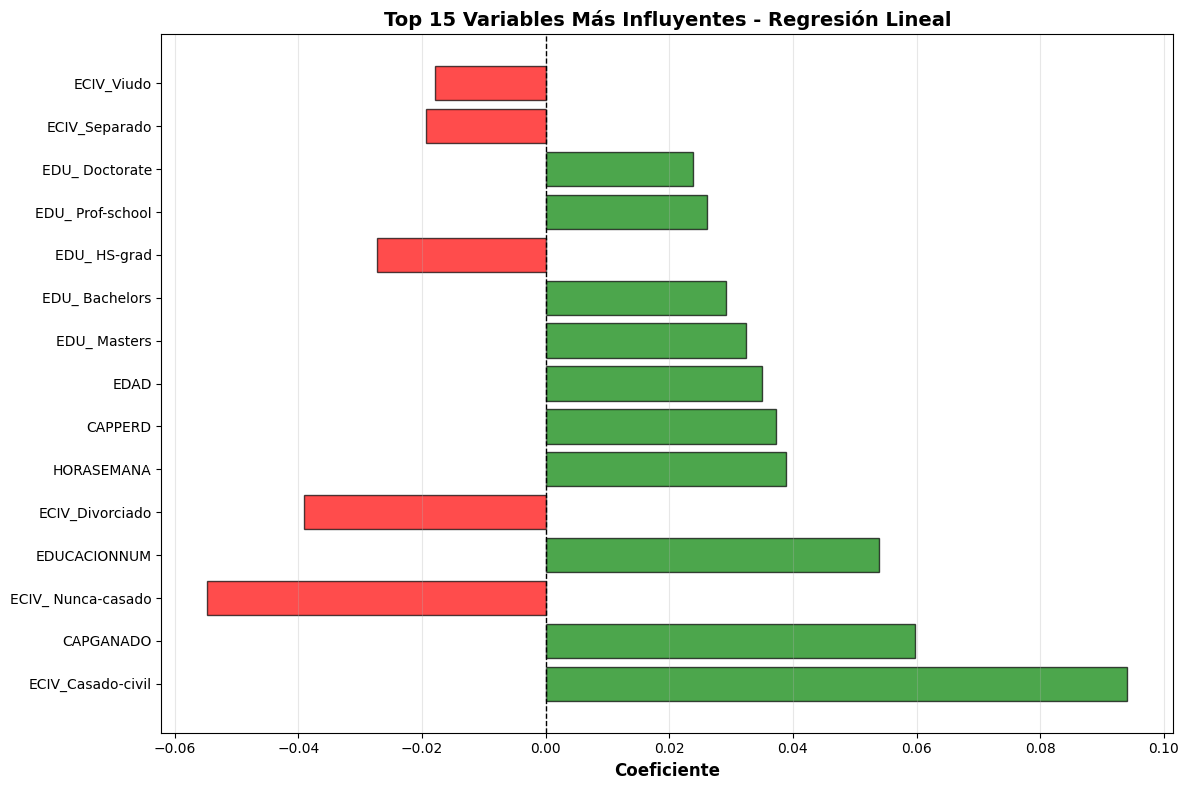

✅ Gráfico guardado: resultados/coeficientes_lineal.png


In [5]:
top_15 = coeficientes_lineal.head(15)

plt.figure(figsize=(12, 8))
colors = ["green" if x > 0 else "red" for x in top_15["Coeficiente"]]
plt.barh(
    range(len(top_15)),
    top_15["Coeficiente"],
    color=colors,
    alpha=0.7,
    edgecolor="black",
)
plt.yticks(range(len(top_15)), top_15["Variable"])
plt.xlabel("Coeficiente", fontsize=12, fontweight="bold")
plt.title(
    "Top 15 Variables Más Influyentes - Regresión Lineal",
    fontsize=14,
    fontweight="bold",
)
plt.axvline(0, color="black", linewidth=1, linestyle="--")
plt.grid(True, alpha=0.3, axis="x")
plt.tight_layout()
plt.savefig("../resultados/coeficientes_lineal.png", dpi=300, bbox_inches="tight")
plt.show()
print("✅ Gráfico guardado: resultados/coeficientes_lineal.png")

## 6. Guardar Modelo


In [6]:
joblib.dump(modelo_lineal, "../resultados/modelo_lineal.pkl")
print("=" * 80)
print("✅ MODELO 2 COMPLETADO")
print("=" * 80)
print(f"   Accuracy en Train: {accuracy_train*100:.2f}%")
print(f"   R² en Train: {r2_train:.4f}")
print(f"   Modelo guardado: resultados/modelo_lineal.pkl")
print("\n➡️ Siguiente paso: Notebook 05 - Comparación y Validación Final")

✅ MODELO 2 COMPLETADO
   Accuracy en Train: 82.88%
   R² en Train: 0.3413
   Modelo guardado: resultados/modelo_lineal.pkl

➡️ Siguiente paso: Notebook 05 - Comparación y Validación Final
